In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/DL Code/Churn_Modelling_Assignment.csv'
df = pd.read_csv(url, header=0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# checking for null values
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


A brief description of the type of data. Geography and gender are categorical, which require encoding. CreditScore, Balance, EstimatedSalary are Numeric and continuous data. Age, tenure, No of Products, HasCrCars, IsActiveMember, Exited are numeric. Exited will be taken as the output variable/ label and the remainng will be independent variables. Exploring more to understand about the data.

#DATA EXPLORATION

In [6]:
# check for duplicates
df.CustomerId.value_counts().unique()

array([1])

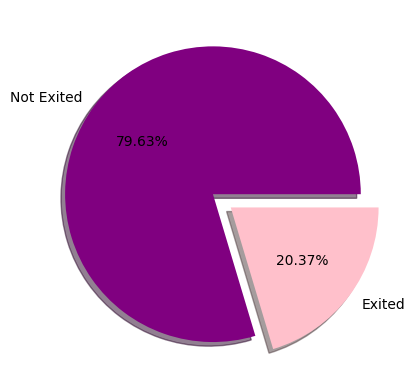

In [7]:
class_counts = df['Exited'].value_counts()

# Plot bar graph
output = df['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Not Exited','Exited']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.2f%%',shadow=True, colors=['purple', 'pink'])
plt.show()

No duplicates were found in the data. But we can see a major class imbalance between exited and not exited. There is a high percentage of Not Exited records as compared to Exited.

In [8]:
(df["Gender"].value_counts()/10000)*100 #male to female percent

,count
Gender,
Male,54.57
Female,45.43


###Table 1: Exited percent(%) with respect to Gender

In [9]:
(df[["Gender","Exited"]].value_counts()/10000)*100 # percent reatined and percent churned

Gender  Exited
Male    0         45.59
Female  0         34.04
        1         11.39
Male    1          8.98
Name: count, dtype: float64

In [10]:
(df.Geography.value_counts()/10000)*100 #records across geography

,count
Geography,
France,50.14
Germany,25.09
Spain,24.77


In [11]:
(df[["Gender","Geography"]].value_counts()/10000)*100 # cross product of two columns, percentage of males and females spread across geography

Gender  Geography
Male    France       27.53
Female  France       22.61
Male    Spain        13.88
        Germany      13.16
Female  Germany      11.93
        Spain        10.89
Name: count, dtype: float64

###Table 2 Exited (%) with respect to Geography

In [12]:
(df[["Geography","Exited"]].value_counts()/10000)*100 # cross product of two columns

Geography  Exited
France     0         42.04
Spain      0         20.64
Germany    0         16.95
           1          8.14
France     1          8.10
Spain      1          4.13
Name: count, dtype: float64

###Table 3 Exited(%) with respect to having a credit card

In [13]:
(df[["HasCrCard","Exited"]].value_counts()/10000)*100 # cross product of two columns

,,count
HasCrCard,Exited,
1,0,56.31
0,0,23.32
1,1,14.24
0,1,6.13


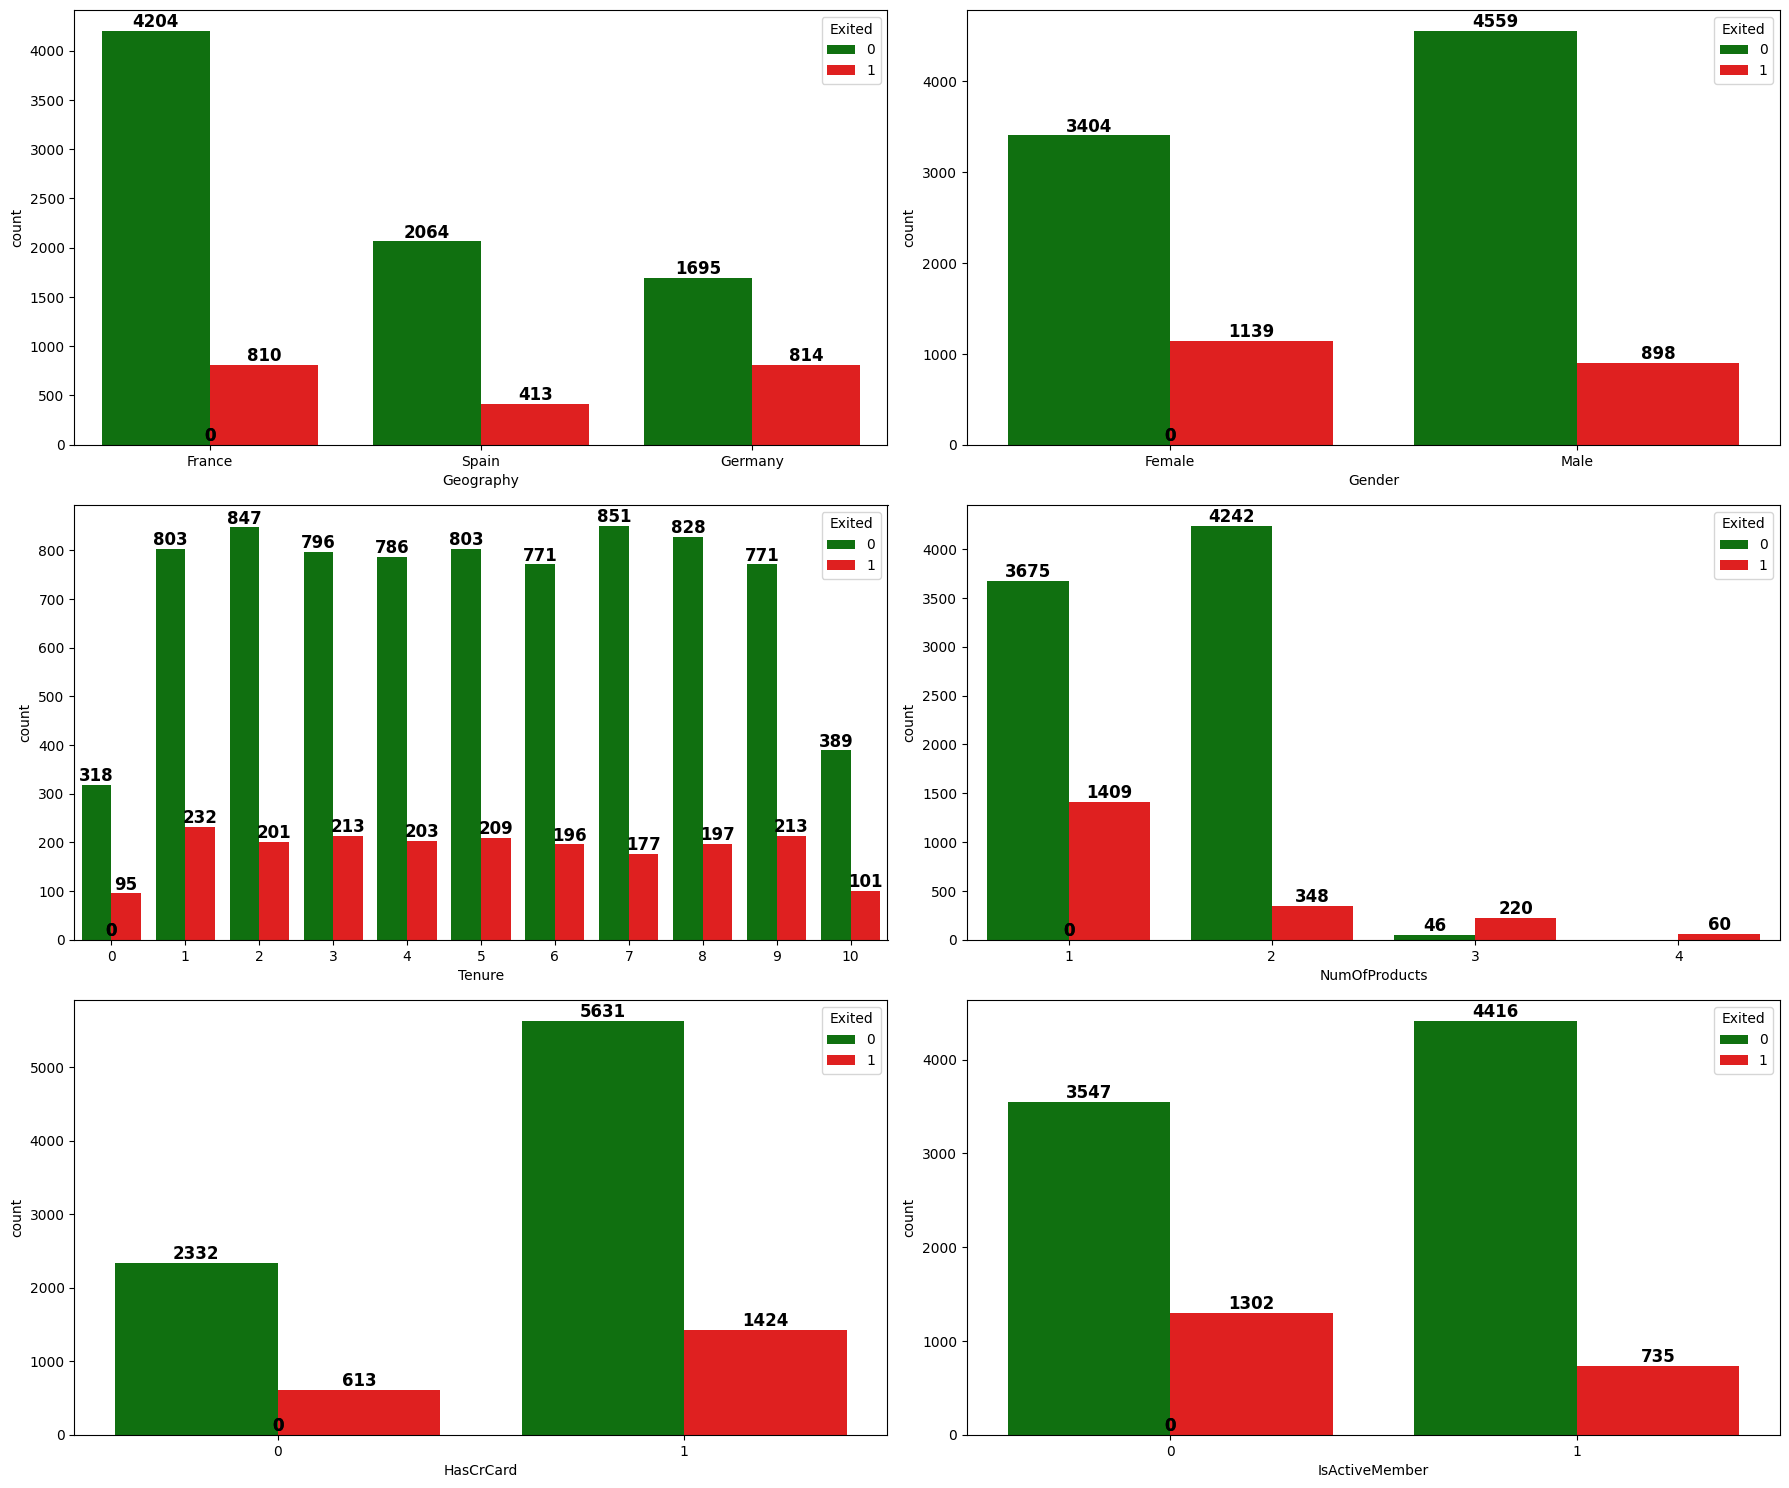

In [14]:
# visualizing categorical variables

# custom color palette
custom_palette = ['green', 'red']

fig, ax = plt.subplots(3, 2, figsize=(18, 15))

# adding labels to bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# plots with labels in 2*3 grid
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0], palette=custom_palette)
add_labels(ax[0][0])

sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1], palette=custom_palette)
add_labels(ax[0][1])

sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0], palette=custom_palette)
add_labels(ax[1][0])

sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1], palette=custom_palette)
add_labels(ax[1][1])

sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0], palette=custom_palette)
add_labels(ax[2][0])

sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1], palette=custom_palette)
add_labels(ax[2][1])

plt.tight_layout()
plt.show()


##Summary of Analysis/Insights from the above Graphs and Tables:


* `The first plot - Geography`: A visual representation of the distribution of excited and not excited customers across Geography-Spain, France, Germany. France has the most customers but also the highest number of retained customers. Germany has the highest churn rate compared to other countries (almost equal churn vs. retention). Spain has a lower churn rate than Germany but still shows noticeable churn. Customers in Germany are more likely to churn than in other countries. It may indicate dissatisfaction or external factors affecting German customers.
* `Second Plot - Gender`: More males are in the dataset yet the proportion of churned females is higher than churned males. Gender plays a role in churn, and female customers might be at a higher risk of leaving
* `Third plot - tenure`: shows us tenure across churning. The plot shows us that there are more customers spread through 1 to 9 years of tenure, but there is approximately similar churning through these years. If the data provided the date of churning, it would have been easier to detect the year with maximum churning and might help the company determine the policy changes or competitor’'s actions which might have prompted the customers to churn. Newer customers (0-3 years) and long-term customers (10 years) are more likely to churn. Possible dissatisfaction at the start or completion of a typical banking lifecycle.
* `The Fourth - plot no of products`: A common insight is that the customer who have used only one product from the company have churned the most. The customers who have used 3 to 4 products, despite less in numbers have mostly churned as compared to using 1 or 2 products. From this we can determine that customers using only one or two products of the company have mostly retained. Also the fact that customers who have used 3 or more products have mostly churned could signify that the company has only one to two good products that sell well or well utilized. Figuring out whether these two products are the same for all customers requires additional data. The distribution of churning across products can help the company focus on those products that retain the customers.
* `The Fifth plot - having credit card`: Majority of customers have a credit card (1). Churn exists in both groups, but having a credit card does not strongly affect churn.
* `The Sixth plot - Active`:  Inactive members have almost twice the churn rate. Inactive customers are at high churn risk. Increasing engagement (e.g., personalized offers, customer interactions) may help retention.


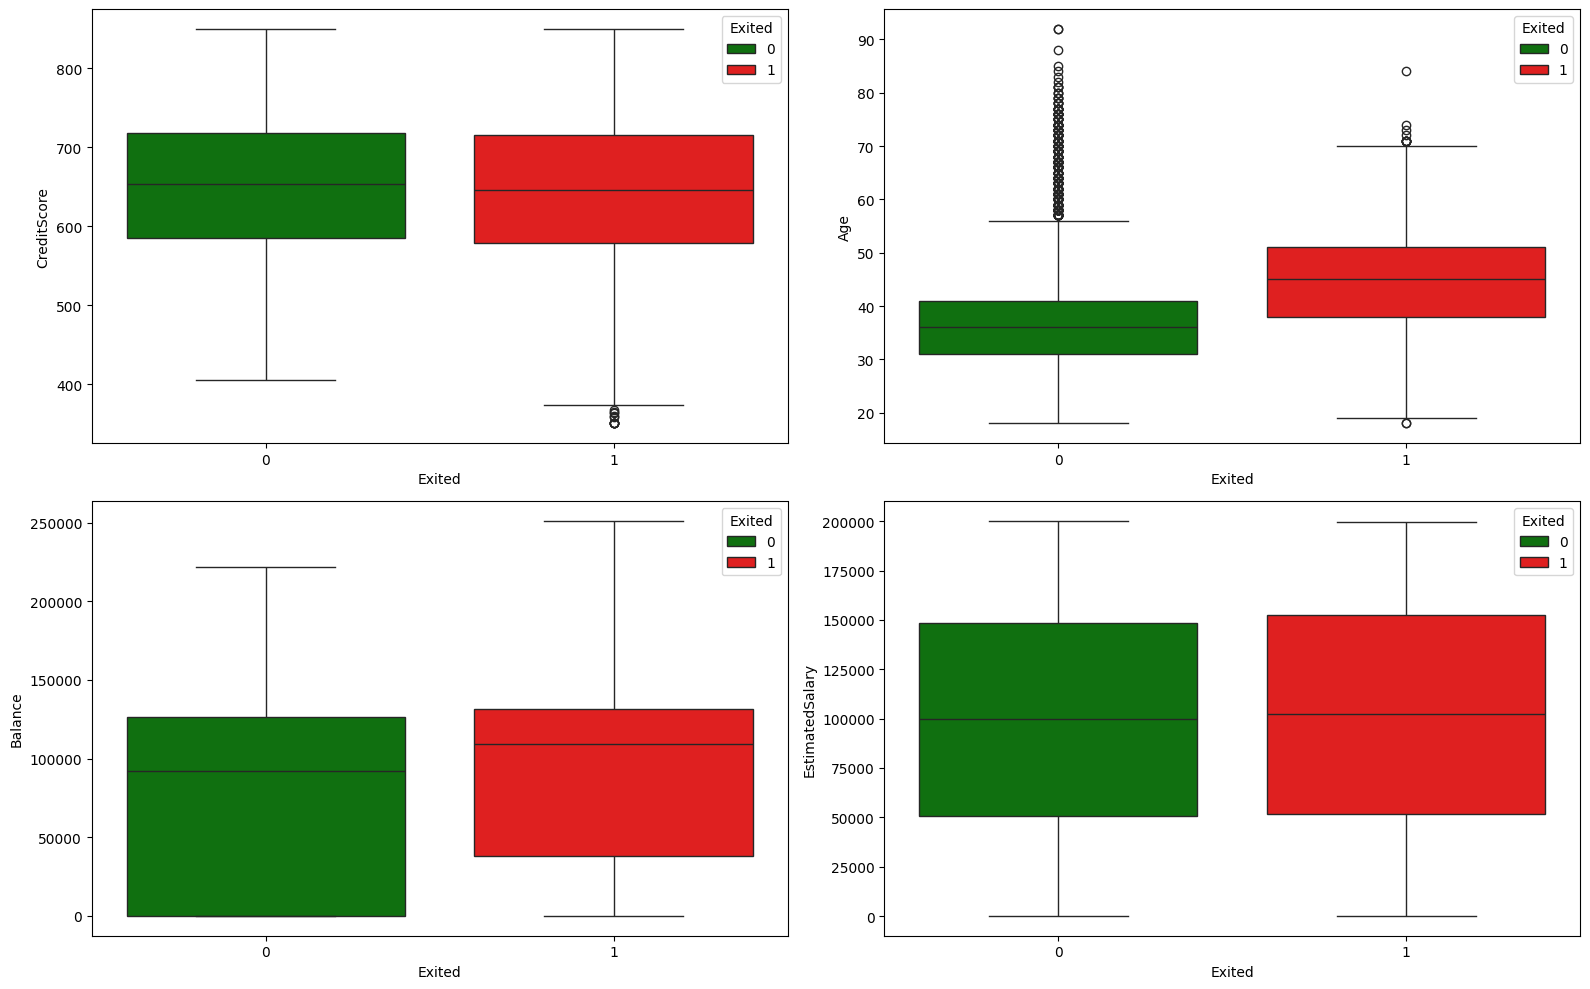

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))
custom_palette = ['green', 'red']

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, hue='Exited', ax = ax[0][0],palette=custom_palette)
sns.boxplot(x = 'Exited', y = 'Age', data = df, hue='Exited', ax = ax[0][1],palette=custom_palette)
sns.boxplot(x = 'Exited', y = 'Balance', data = df, hue='Exited', ax = ax[1][0],palette=custom_palette)
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, hue='Exited', ax = ax[1][1],palette=custom_palette)

plt.tight_layout()
plt.show()

## Analysis of Box PLot for Continuous Numeric Independent Variables


* `Box Plot 1 - credit score`: The median of exited and not exited customers is almost the same, but with not- exited customers having slightly higher median credit score. The plot shows that credit score might not be a strong predictor of customer churning.
* `Box Plot 2 - Age and Exited`: The median age of customers who have exited is 45 as compared to not exited customers being 36. The company should target between the age group 39 to 52, in order to retain and avoid the customers churning. The company could try providing additional benefits for the customers belonging to this age group who comprise established working professionals.
* `Box Plot 3 - Balance score and Exited`: An interesting insight here is that customers who have exited have a higher median as compared to not exited customers. The XYZ company should focus more on customers with higher balance. This can be linked with the 39 to 52 age group as this is the period of career growth for most working customers and who are mostly cautious, preparing for retirement. Older customers are more likely to leave.
* `Box Plot 4 - Estimated Salary score and Exited`: The exited customers have almost same median of estimated salary as compared to the not exited.


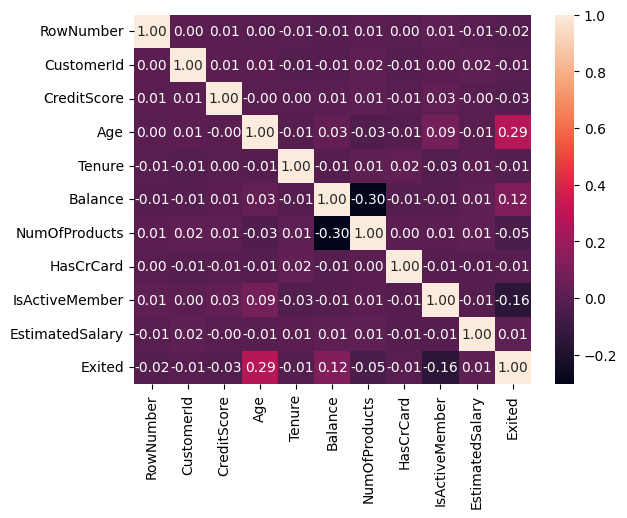

In [16]:
# Drop non-numerical columns before calculating correlation.
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

The above correlation matrix shows us that there is no high multicollinearity between the avriables. Therefore all variables can be used for the model.

#DATA PREPROCESSING

In [17]:
df.drop(columns=["RowNumber","CustomerId","Surname"], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Droping columns that do not add information or importance to build the model and then checking if the necessary columns are included.


###Encoding categorical variables Geography and Gender. Then checking if they are encoded as expected.

In [18]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


* Spliting the output labels or dependent variable from independent variables.

* pliting the dataset into testing and training set with 80:20 split. X_test,y_test, X_train, y_train


* Aplying standardization to training set X_test. Scaling all the independnet variables to avoid the ouput label to preserve the variation in the dataset and avoid dominance of one variable through magnitude during training.


In [40]:
X = df.drop('Exited', axis = 1)
y = df.Exited

# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#BUILDING THE ANN MODEL

* The ann model is initialised using keras sequential into the variable called model.
* The `first layer` with `10 inputs` and the `first hidden layer` with `6 neurons` are initialised. The `kernel initializer` is `he-normal`. `ReLU activation` (max(0, x)) sets negative values to zero, which can cause a vanishing gradient issue, he-normal initialization scales weights to prevent neuron activations from shrinking too much. The activation is relu, Customer churn depends on complex relationships between factors like age, credit score, balance, and salary. ReLU allows the model to learn non-linear patterns more effectively, with less computational cost.
* A `0.1 dropout rate` is added, 10% of neurons are dropped randomly during training which prevents overfitting and makes the model better at generalizing.  
* `Batch normalization` is added to stabilize the outputs of neurons which become inputs for the next layer of neurons. This speeds up the convergence and reduces internal covariate shift and speeds up the convergence.
* The `third layer` with 6 neurons is initialized with he-normal and activation relu.
* Dropout of 0.1 and batch normalization is also added after the third layer.
* The `final layer` is added with `1 neuron` with `glorot_normal` initialization and `sigmoid activation` for probability(values between 0-1).
* The model is then compiled with `adam optimizer`. `Binary cross entropy` is used since the output is `binary classification` using sigmoid. `Accuracy` is used to keep track of the `model performance`.


In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(6, kernel_initializer = 'he_normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(6, kernel_initializer = 'he_normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(1, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5720 - loss: 0.7366 - val_accuracy: 0.7812 - val_loss: 0.5670
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7645 - loss: 0.5564 - val_accuracy: 0.8092 - val_loss: 0.4830
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7822 - loss: 0.5053 - val_accuracy: 0.8104 - val_loss: 0.4566
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7912 - loss: 0.4888 - val_accuracy: 0.8112 - val_loss: 0.4389
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7908 - loss: 0.4751 - val_accuracy: 0.8128 - val_loss: 0.4235
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7987 - loss: 0.4657 - val_accuracy: 0.8164 - val_loss: 0.4091
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8071 - loss: 0.4492 - val_accuracy: 0.8224 - val_loss: 0.4001
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8111 - loss: 0.4312 - val_accu

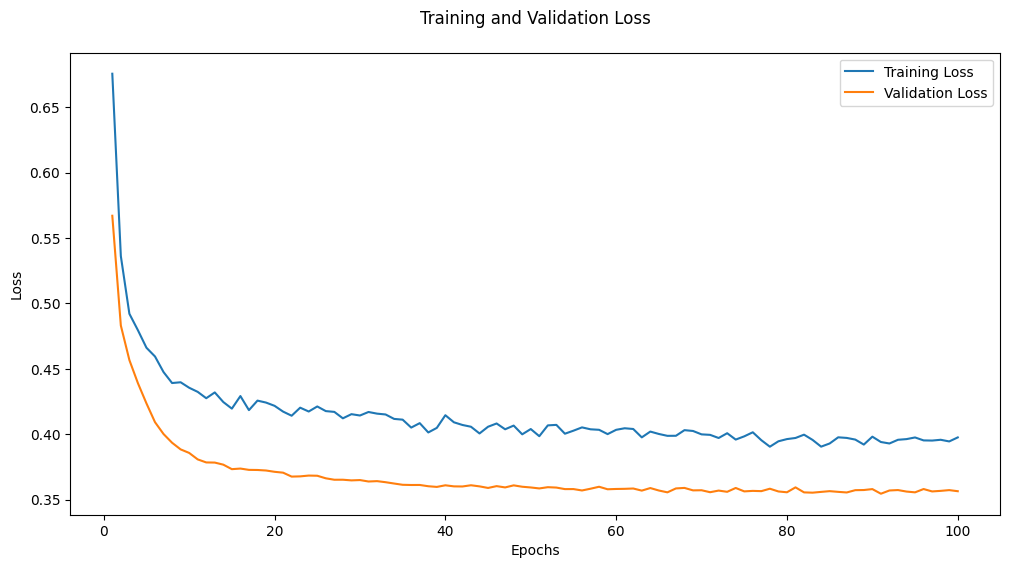

In [42]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 101)
sns.lineplot(x=epoch, y=train_loss, label = 'Training Loss') # Changed to use keyword arguments x and y
sns.lineplot(x=epoch, y=val_loss, label = 'Validation Loss') # Changed to use keyword arguments x and y
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

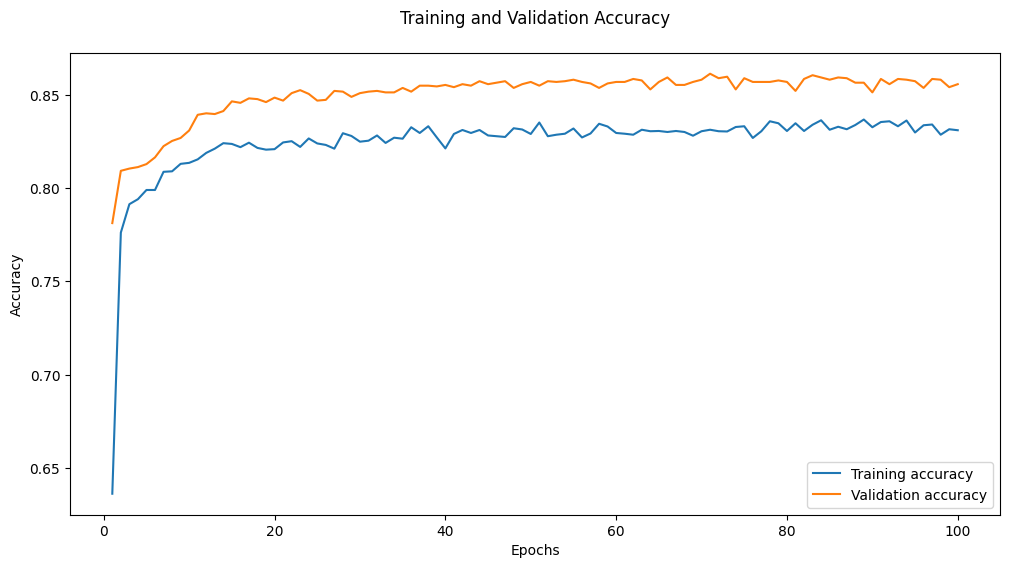

In [43]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 101)
sns.lineplot(x=epoch, y=train_loss, label = 'Training accuracy') # Changed to use keyword arguments x and y
sns.lineplot(x=epoch, y=val_loss, label = 'Validation accuracy') # Changed to use keyword arguments x and y
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[1889  122]
 [ 259  230]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2011
           1       0.65      0.47      0.55       489

    accuracy                           0.85      2500
   macro avg       0.77      0.70      0.73      2500
weighted avg       0.84      0.85      0.84      2500



In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1965   46]
 [ 315  174]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2011
           1       0.79      0.36      0.49       489

    accuracy                           0.86      2500
   macro avg       0.83      0.67      0.70      2500
weighted avg       0.85      0.86      0.83      2500



In [46]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 6)                   │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 6)                   │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 24 (96.00 B)

 Optimizer params: 280 (1.10 KB)

In [47]:
feature_importance = pd.DataFrame({'Feature': X.columns,
                                      'Importance': model.layers[0].weights[0].numpy().flatten()[:len(X.columns)]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
           Feature  Importance
8   IsActiveMember    0.783193
3              Age    0.175544
7        HasCrCard    0.152912
2           Gender    0.138447
6    NumOfProducts    0.061200
5          Balance   -0.010147
0      CreditScore   -0.059520
1        Geography   -0.115704
4           Tenure   -0.137227
9  EstimatedSalary   -0.217031
